In [6]:
import numpy as np
from pygabor.rectimecausgabor import RecursiveTimeCausGaborMethod
from importlib import reload
from matplotlib import pyplot as plt

In [7]:
#reload(pygabor.rectimecausgabor)

In [8]:
# Generate a temporal signal for testing purposes

Nt = 100
delta_t = 1

time = delta_t * np.linspace(0, Nt-1, Nt)
omega_1 = 0.1 * time
omega_2 = 2 * time
testsignal = np.zeros(Nt)

#testsignal = np.cos(omega_1) + np.cos(omega_2)
testsignal = np.cos(omega_1)

print(testsignal)


[ 1.          0.99500417  0.98006658  0.95533649  0.92106099  0.87758256
  0.82533561  0.76484219  0.69670671  0.62160997  0.54030231  0.45359612
  0.36235775  0.26749883  0.16996714  0.0707372  -0.02919952 -0.12884449
 -0.22720209 -0.32328957 -0.41614684 -0.5048461  -0.58850112 -0.66627602
 -0.73739372 -0.80114362 -0.85688875 -0.90407214 -0.94222234 -0.97095817
 -0.9899925  -0.99913515 -0.99829478 -0.98747977 -0.96679819 -0.93645669
 -0.89675842 -0.84810003 -0.79096771 -0.7259323  -0.65364362 -0.57482395
 -0.49026082 -0.40079917 -0.30733287 -0.2107958  -0.11215253 -0.01238866
  0.08749898  0.18651237  0.28366219  0.37797774  0.46851667  0.55437434
  0.63469288  0.70866977  0.77556588  0.83471278  0.88551952  0.92747843
  0.96017029  0.98326844  0.9965421   0.99985864  0.99318492  0.97658763
  0.95023259  0.91438315  0.86939749  0.8157251   0.75390225  0.68454667
  0.60835131  0.52607752  0.43854733  0.34663532  0.25125984  0.15337386
  0.05395542 -0.04600213 -0.14550003 -0.24354415 -0

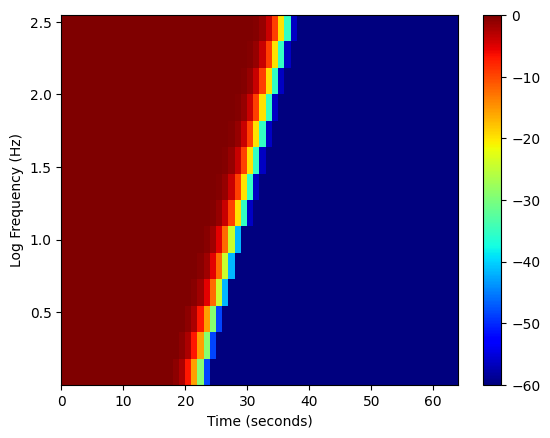

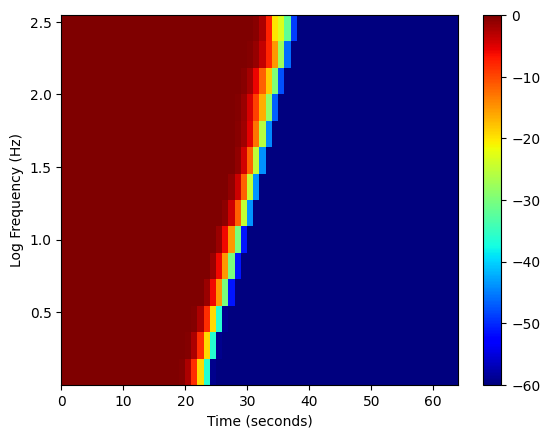

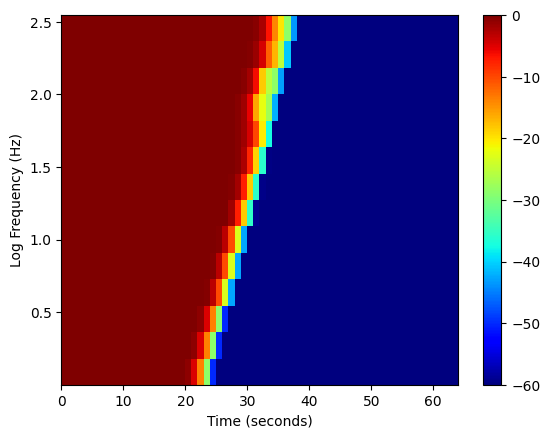

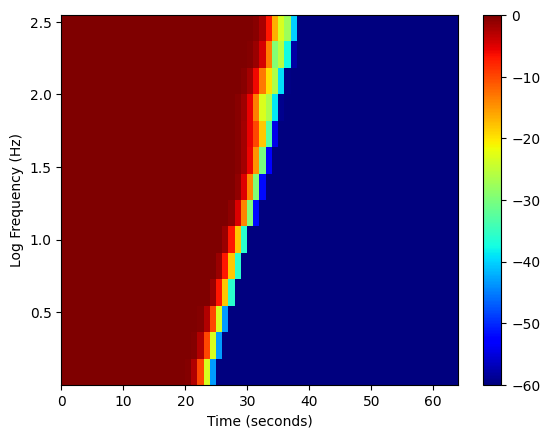

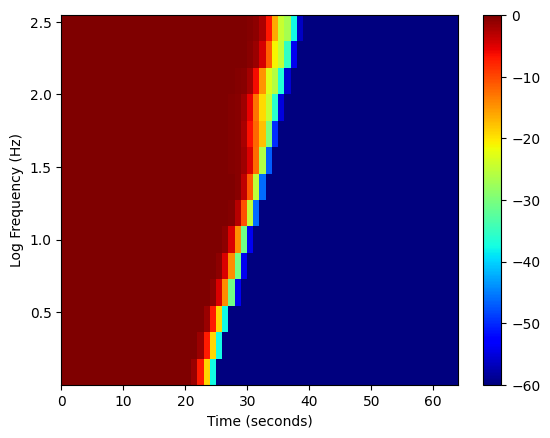

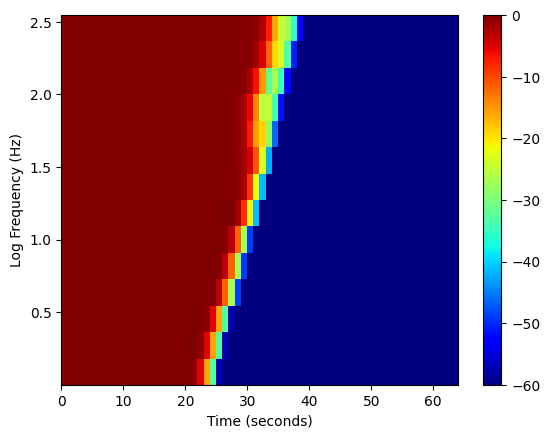

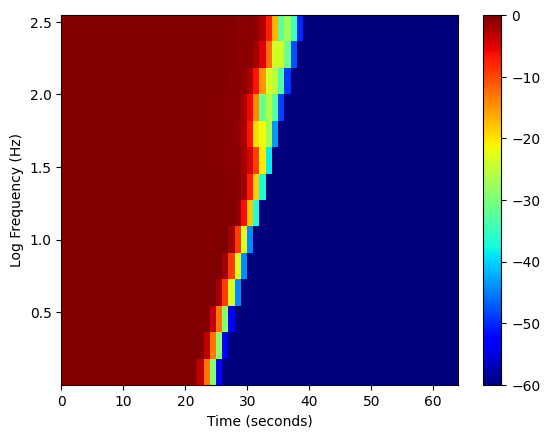

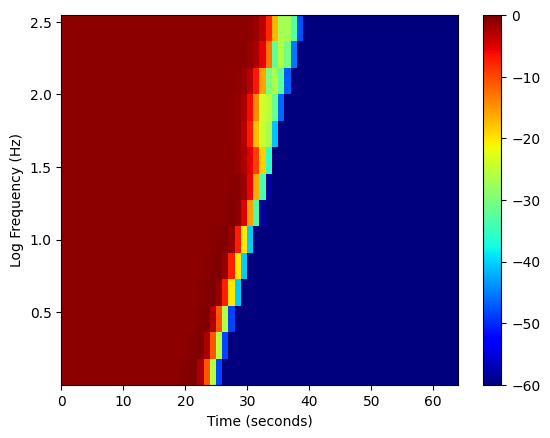

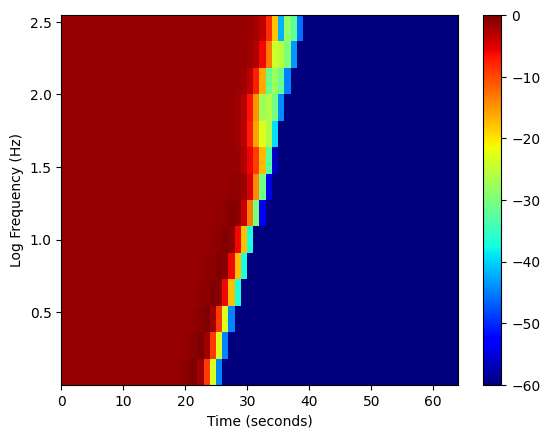

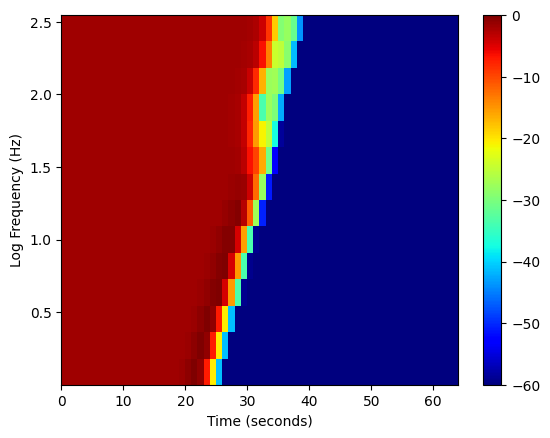

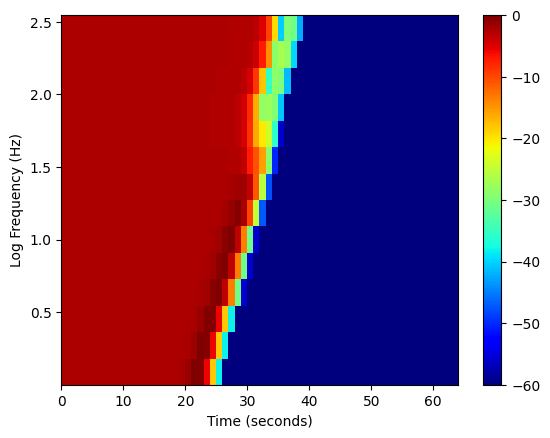

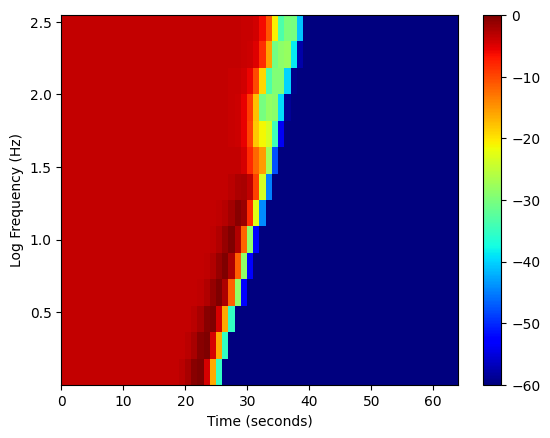

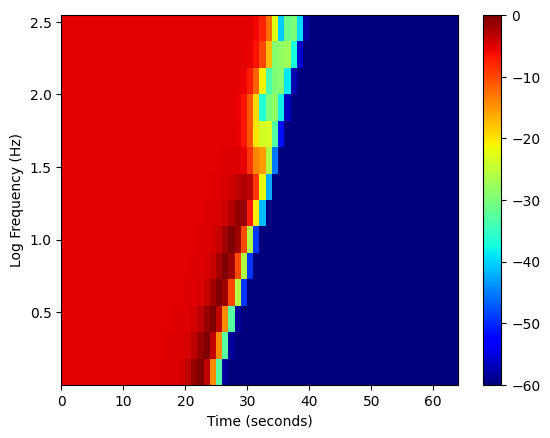

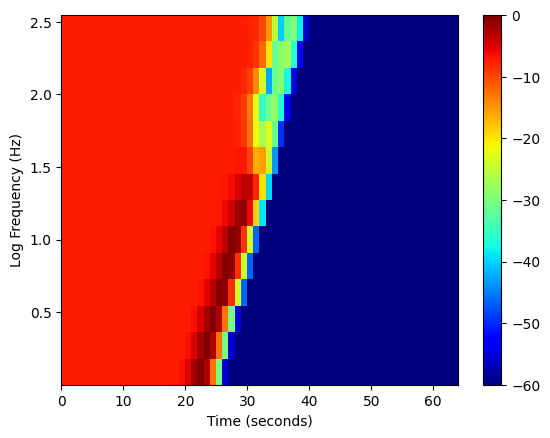

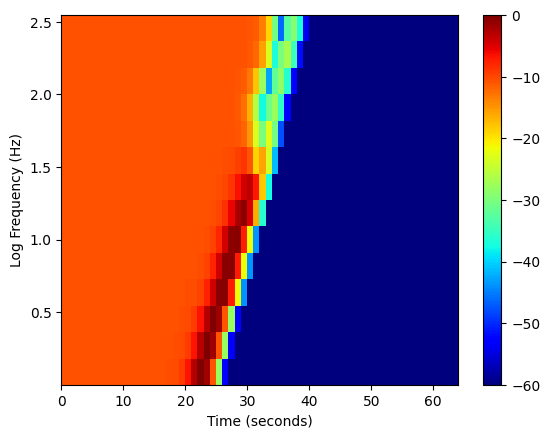

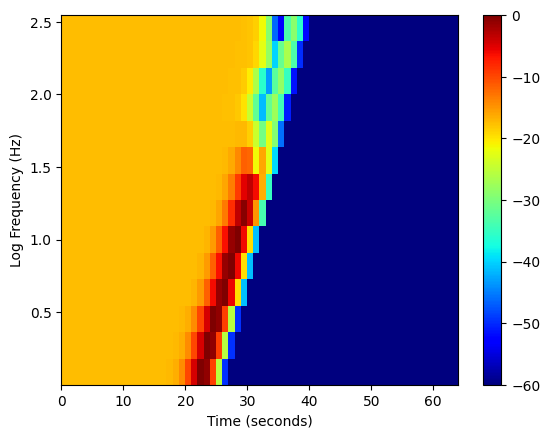

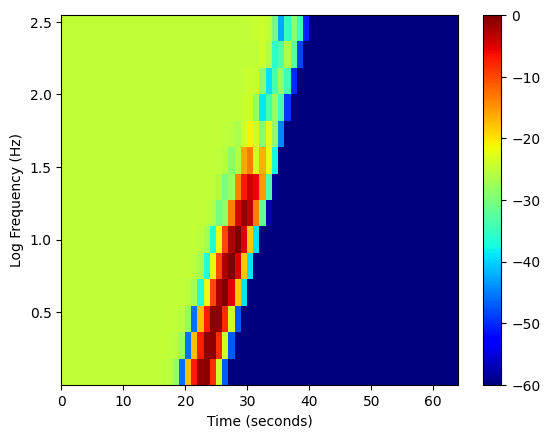

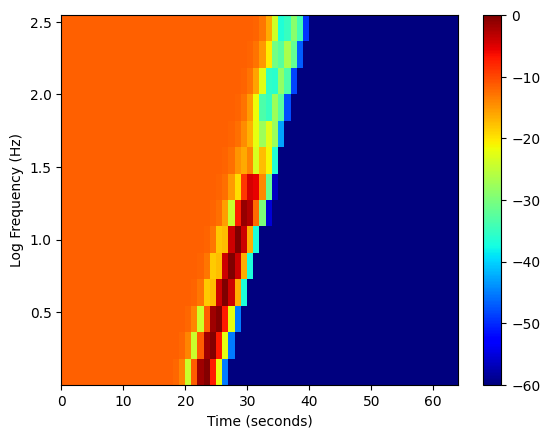

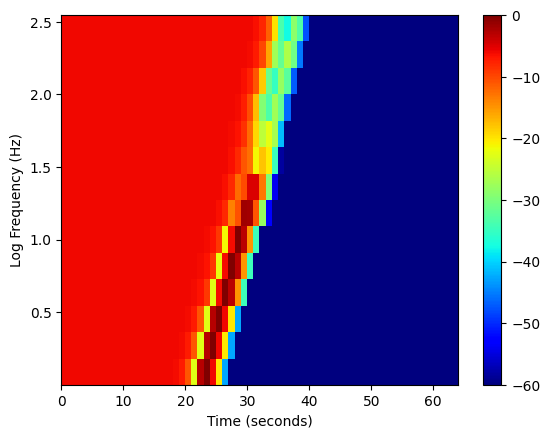

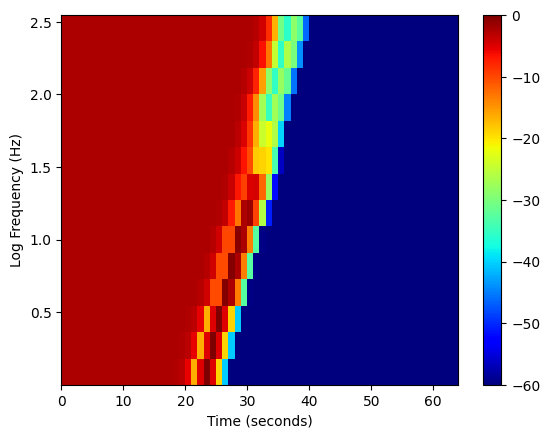

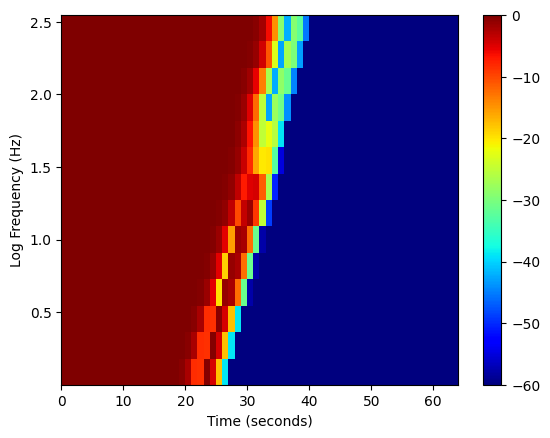

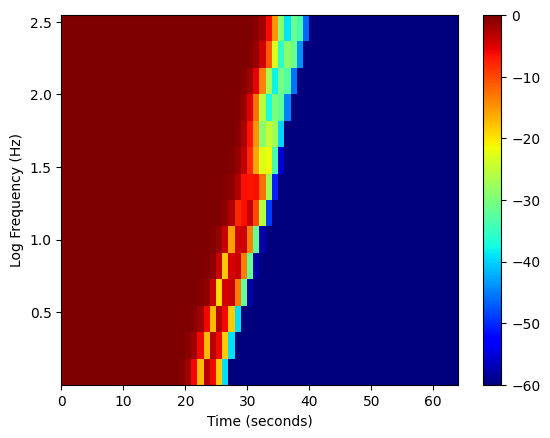

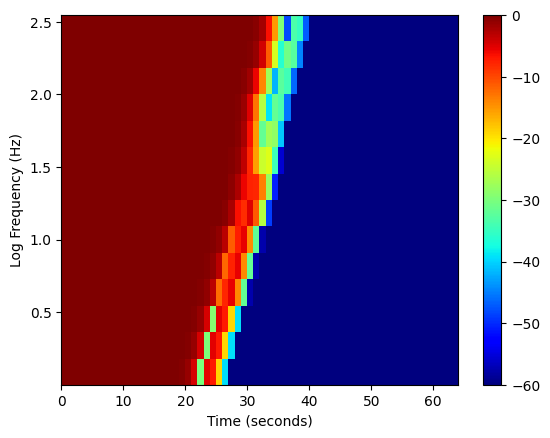

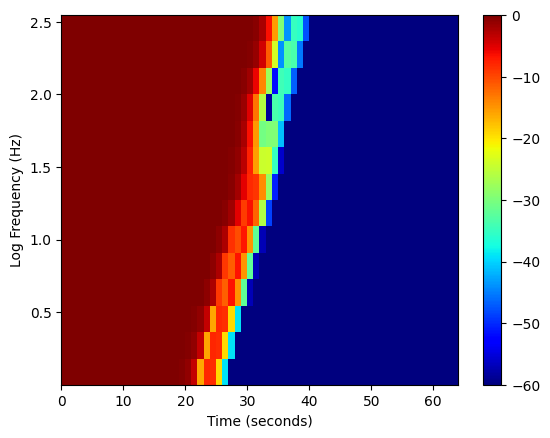

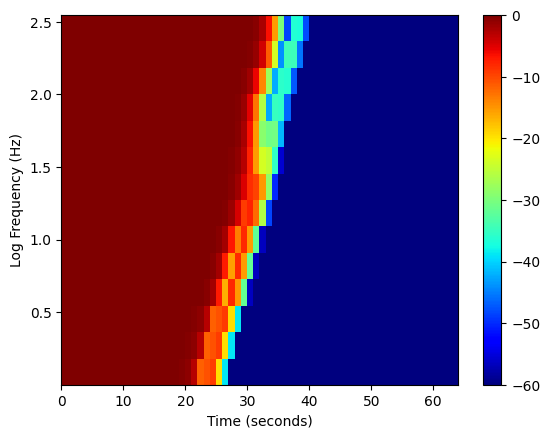

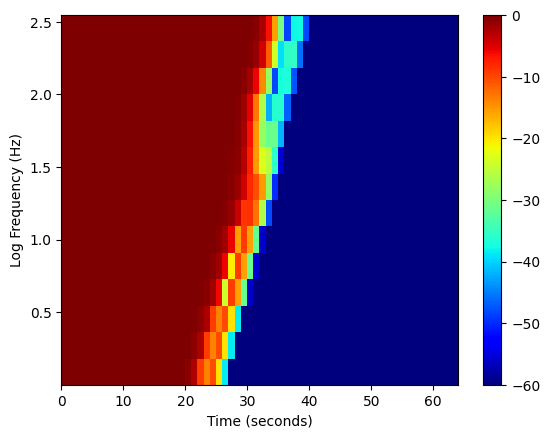

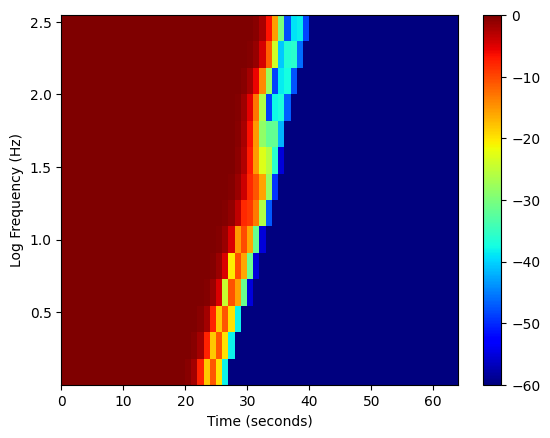

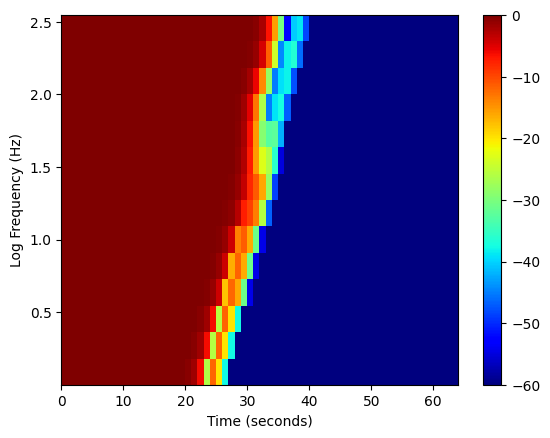

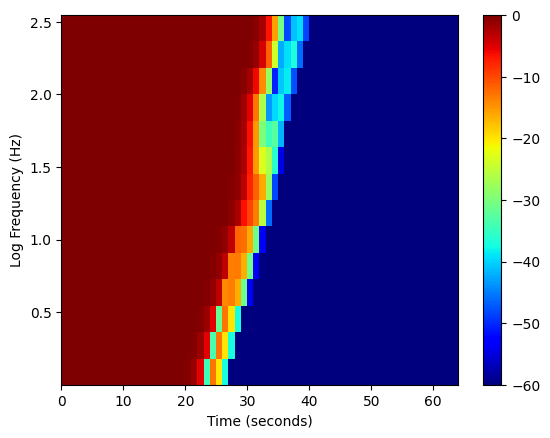

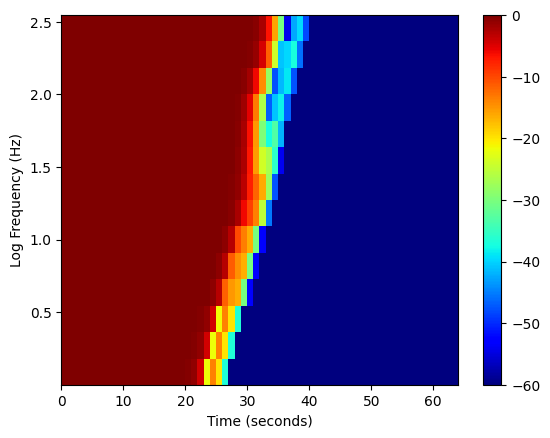

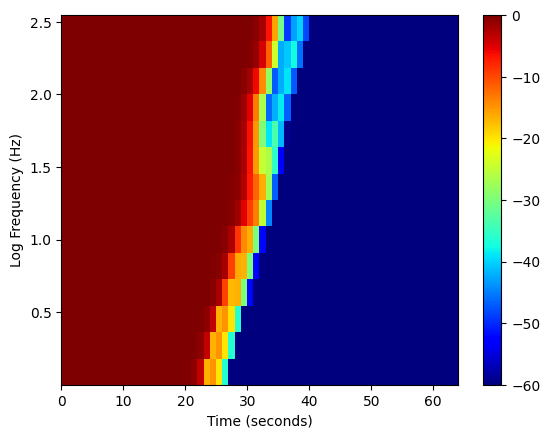

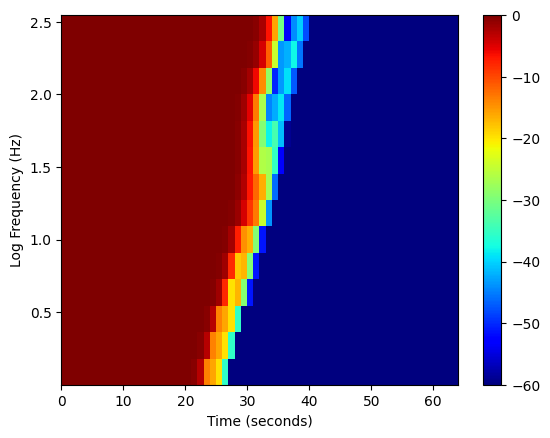

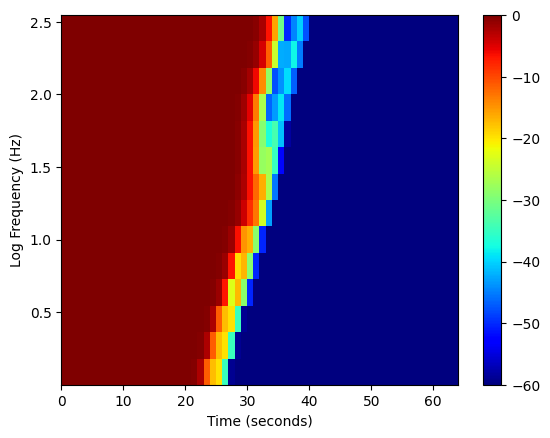

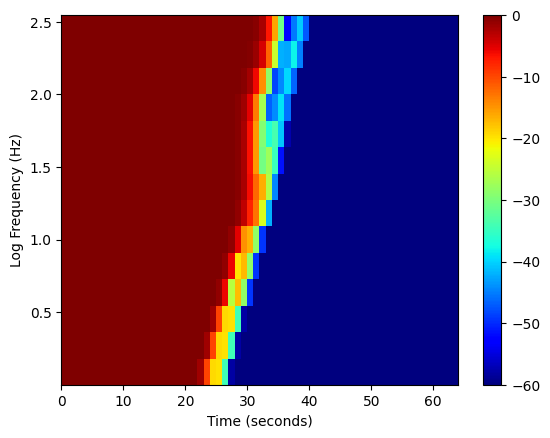

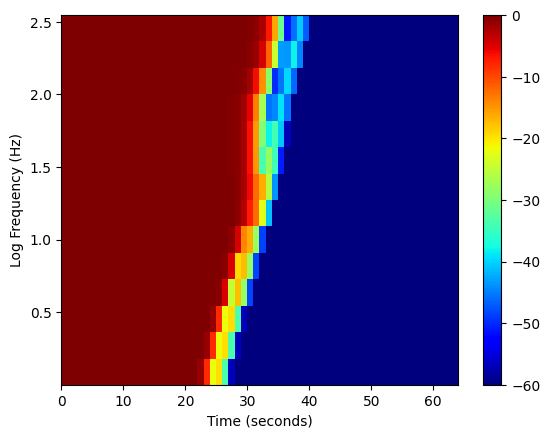

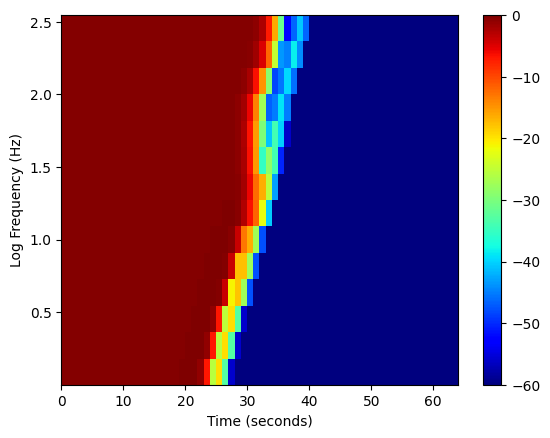

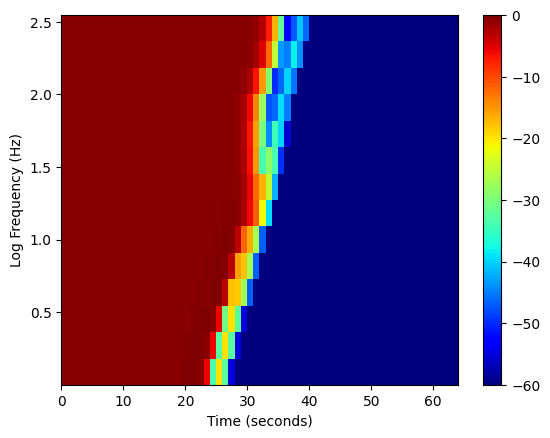

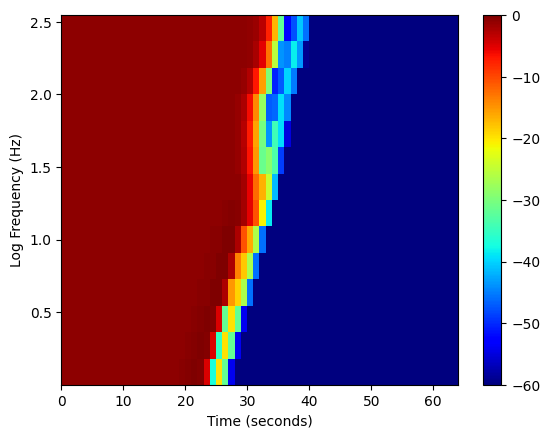

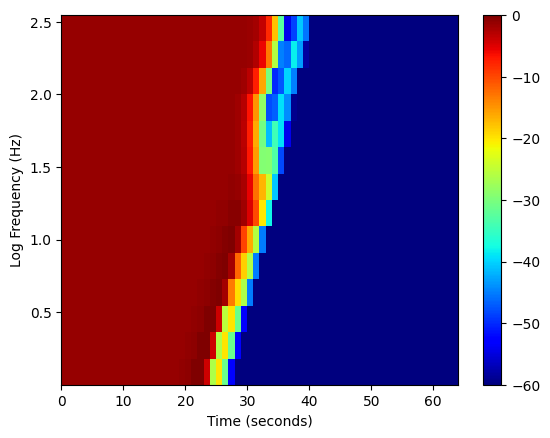

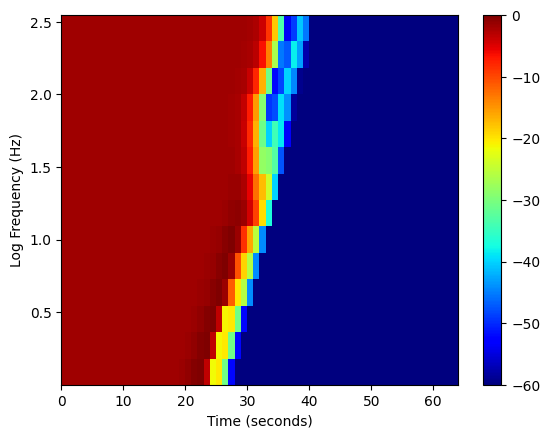

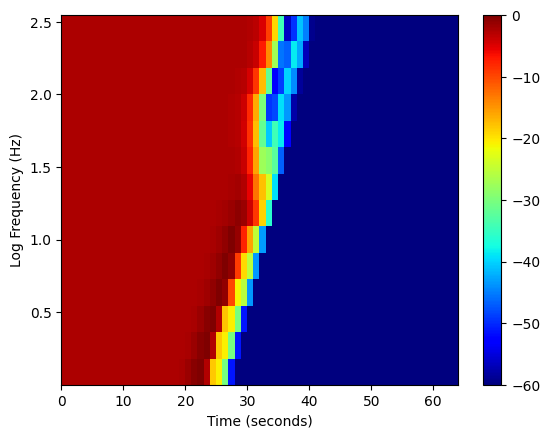

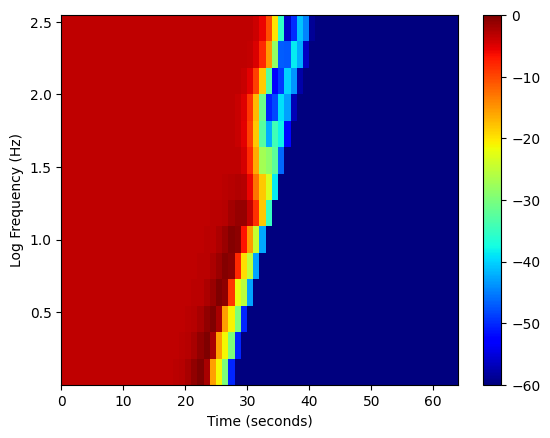

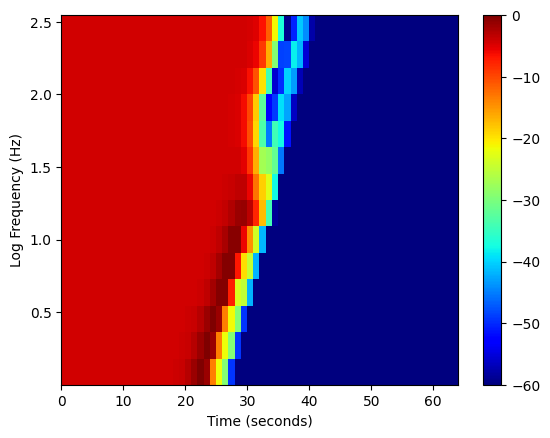

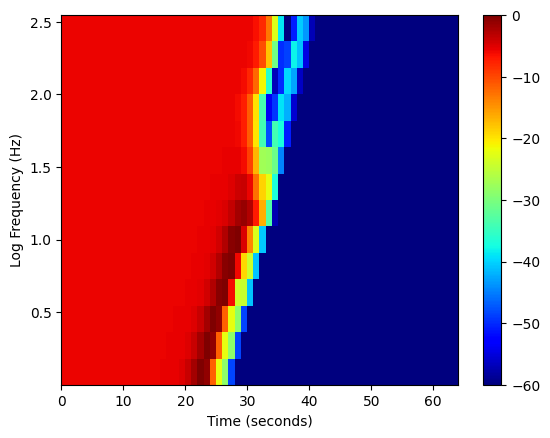

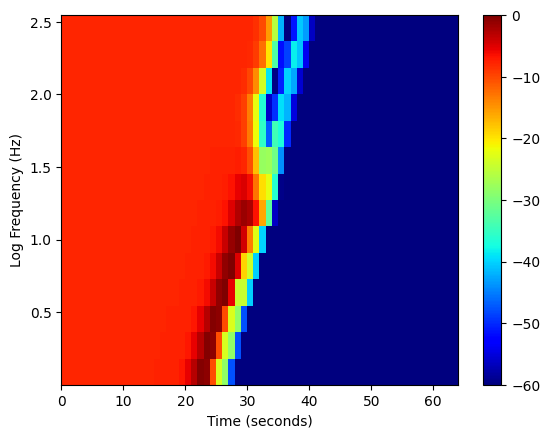

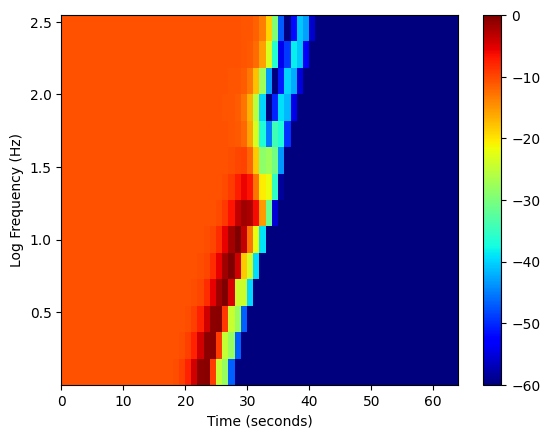

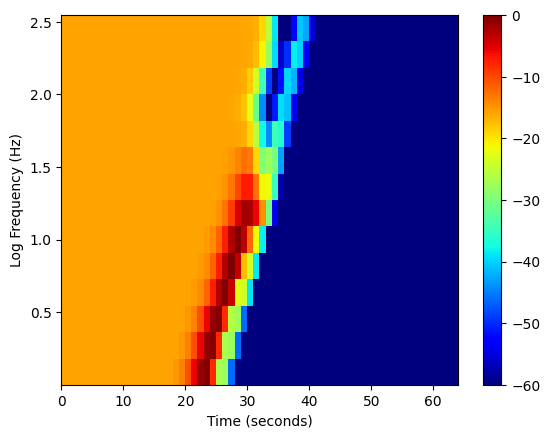

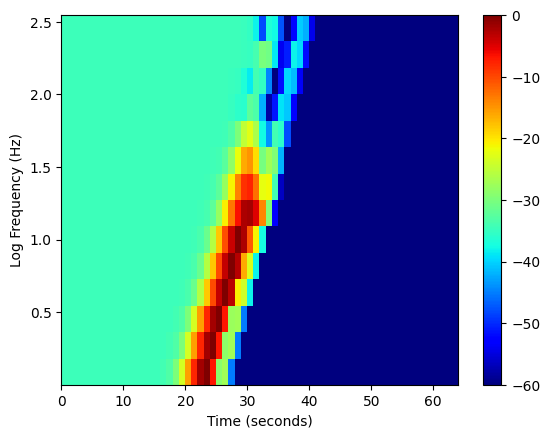

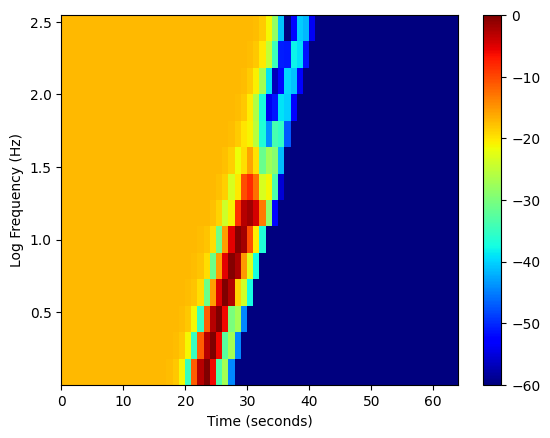

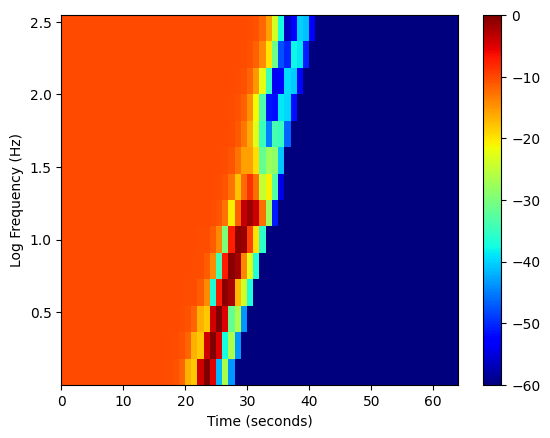

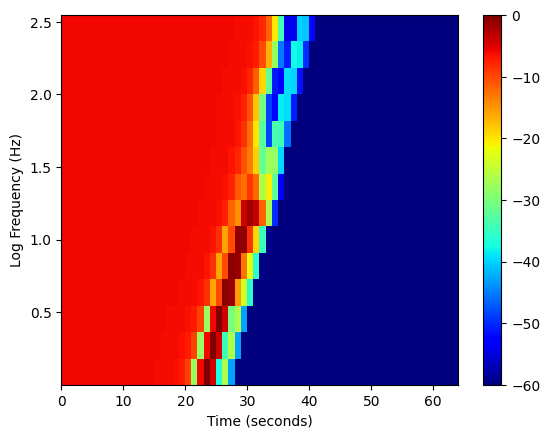

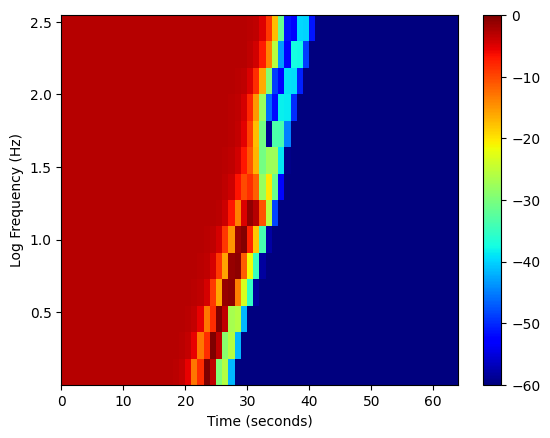

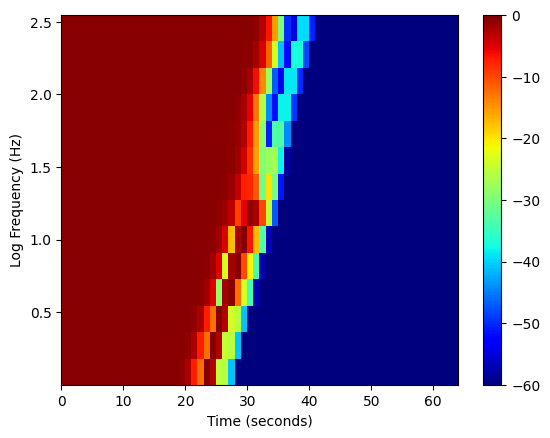

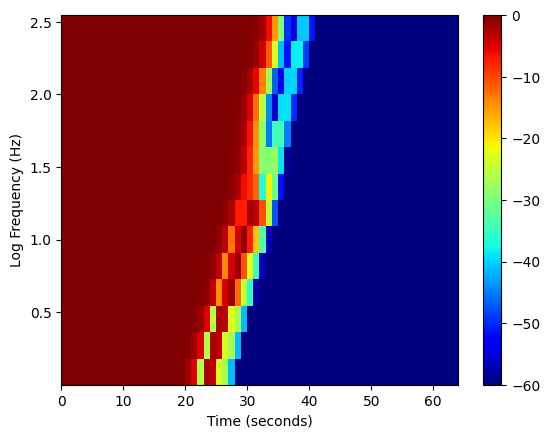

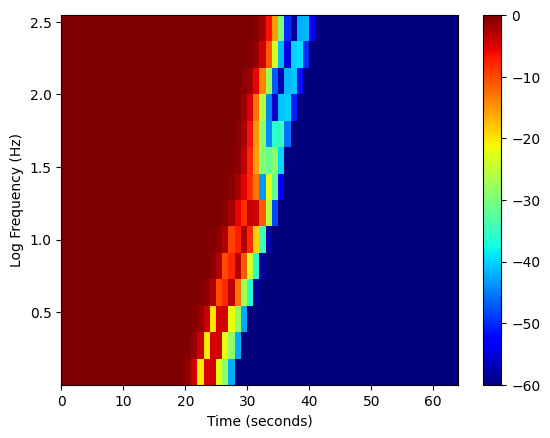

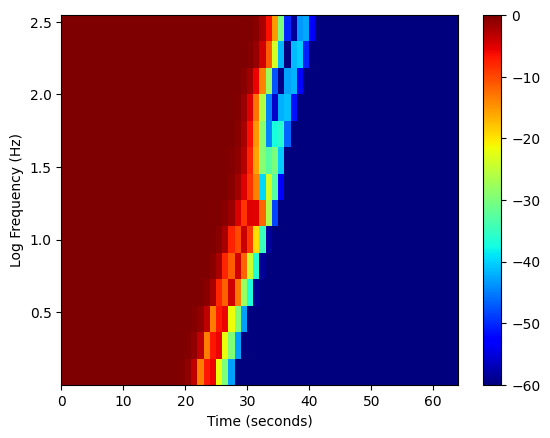

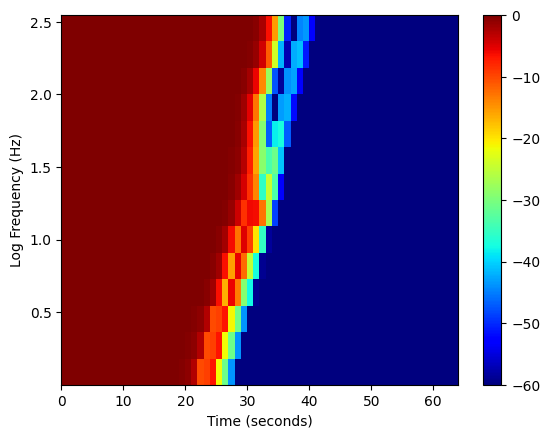

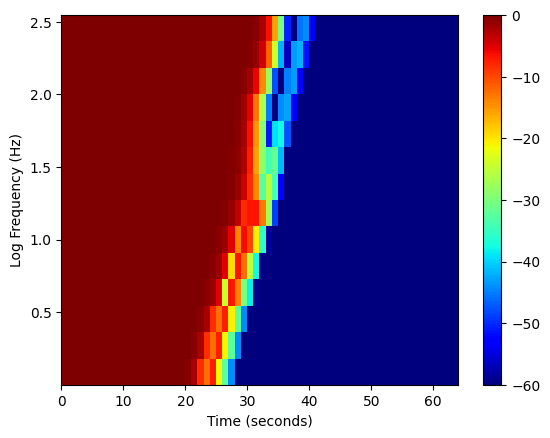

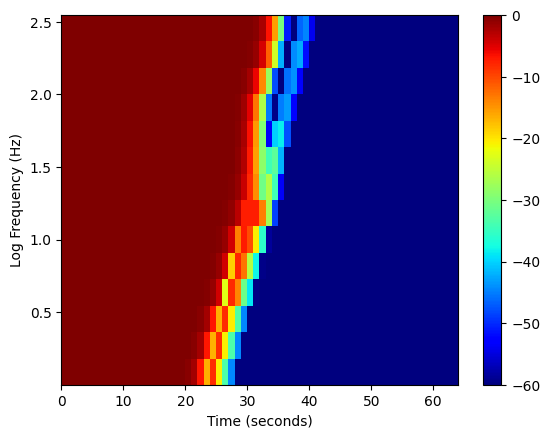

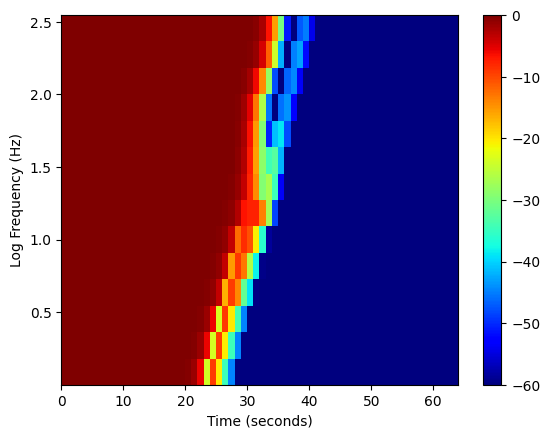

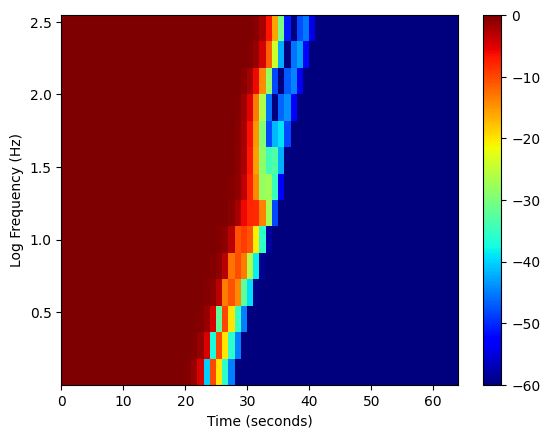

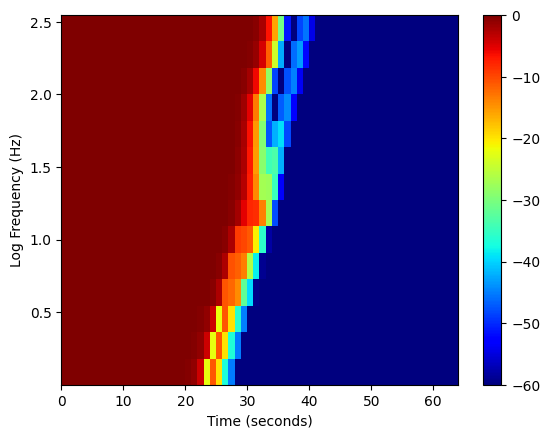

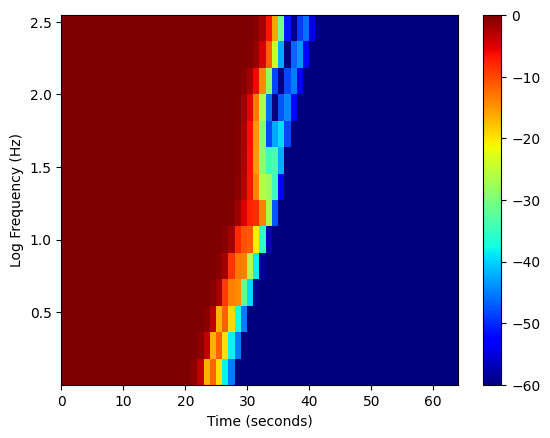

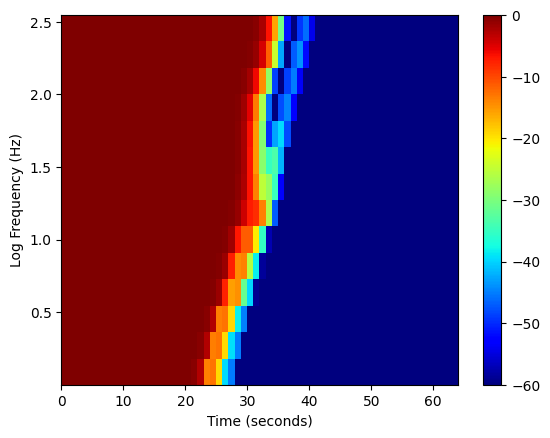

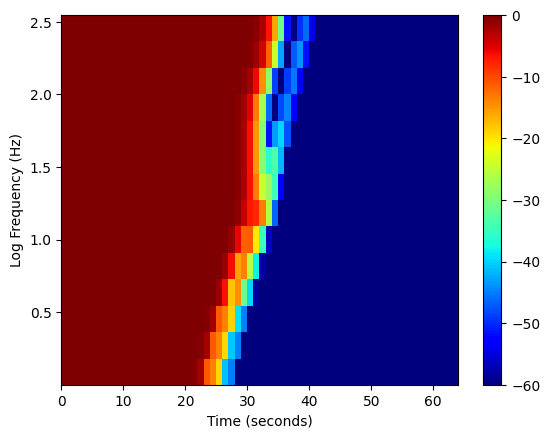

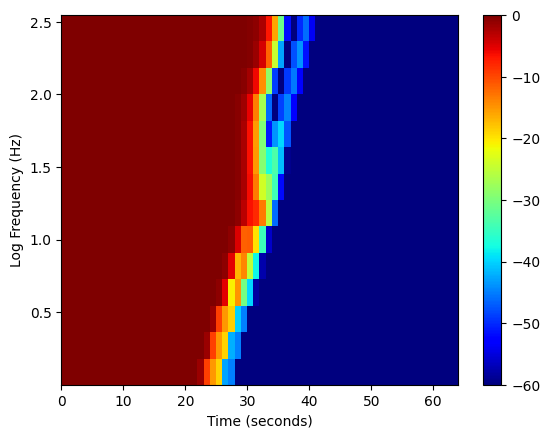

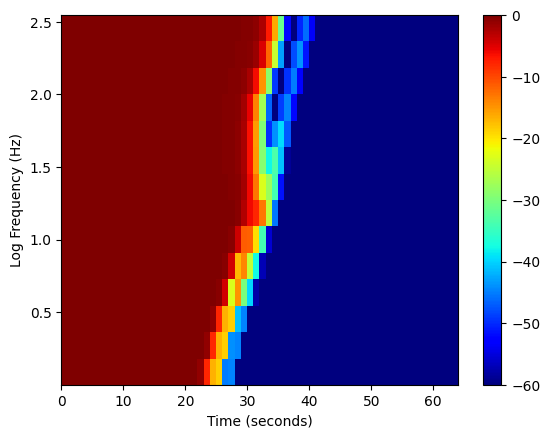

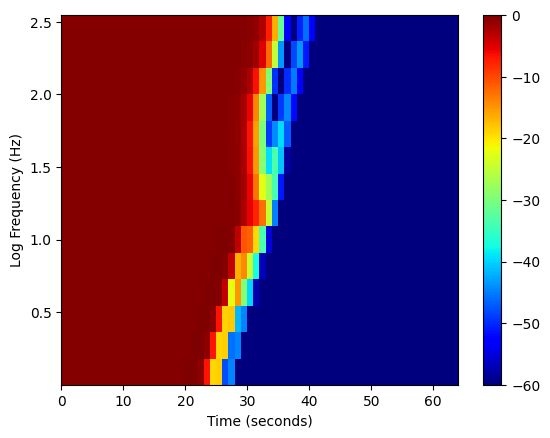

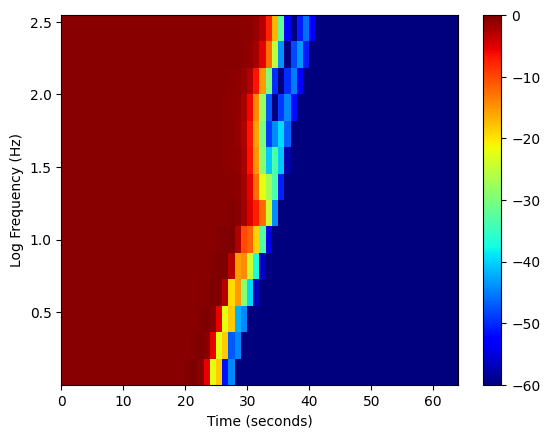

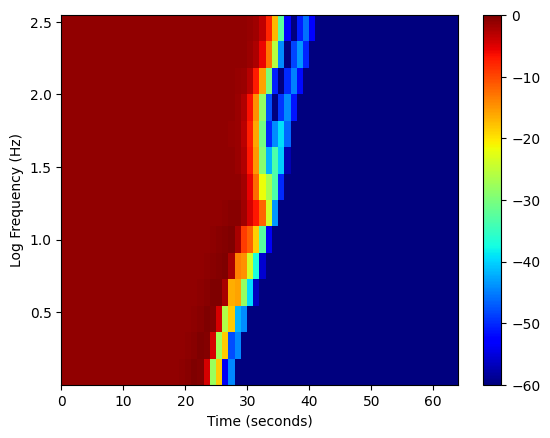

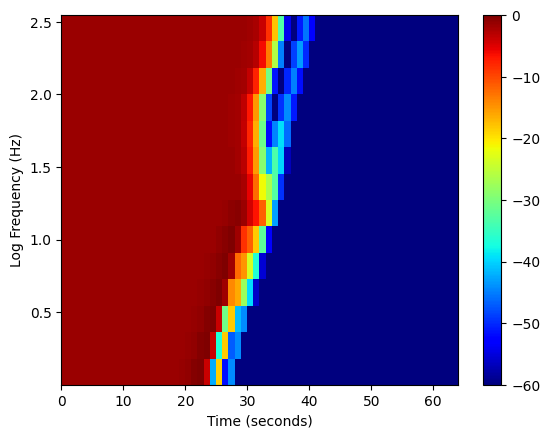

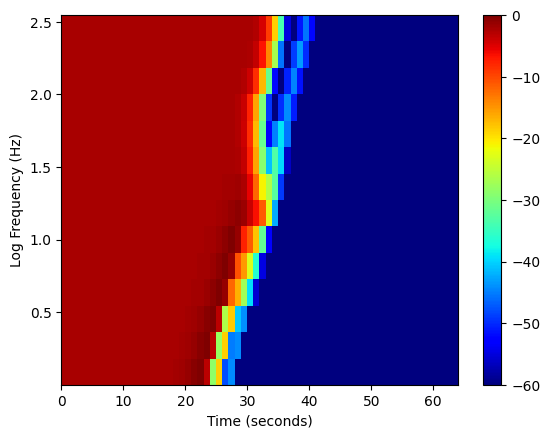

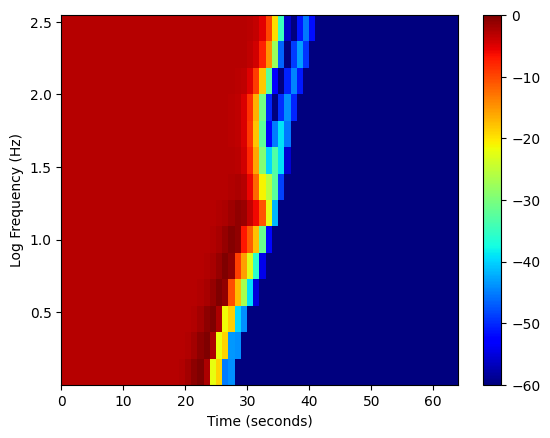

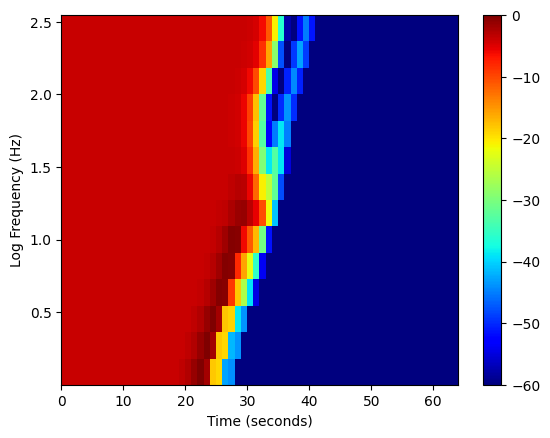

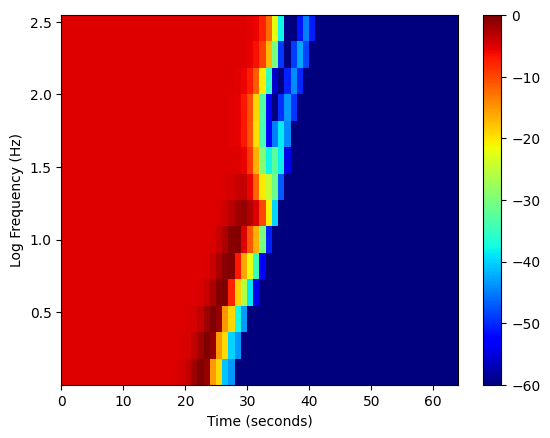

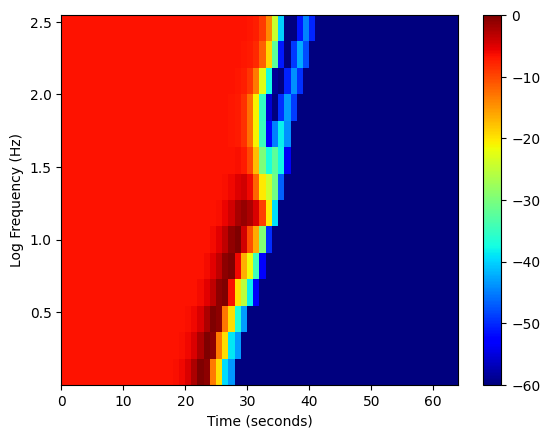

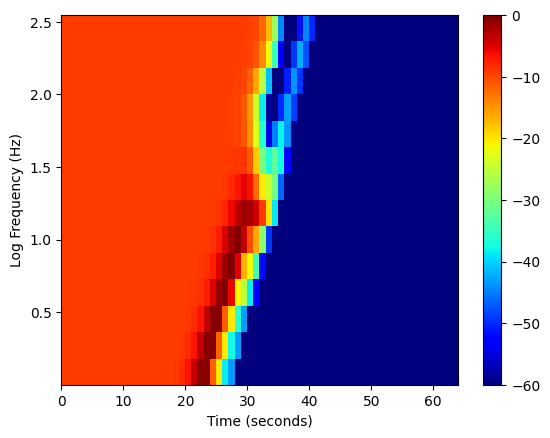

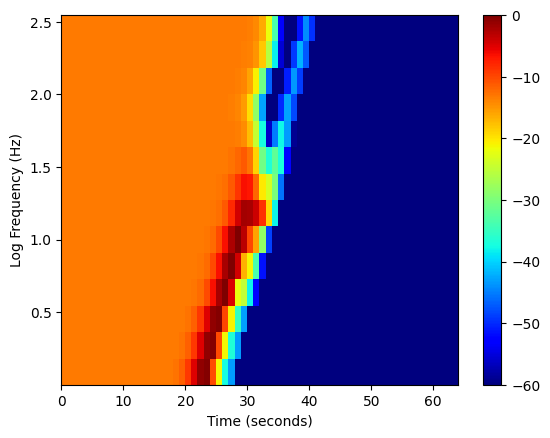

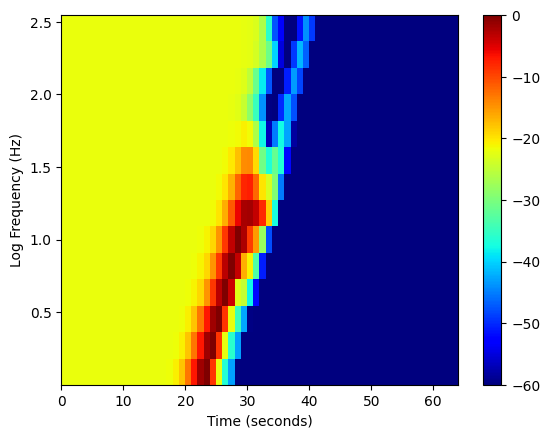

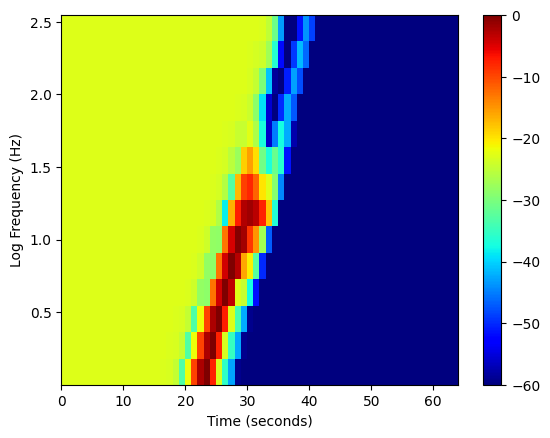

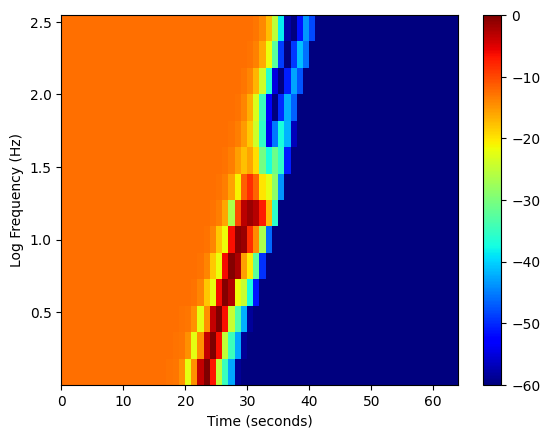

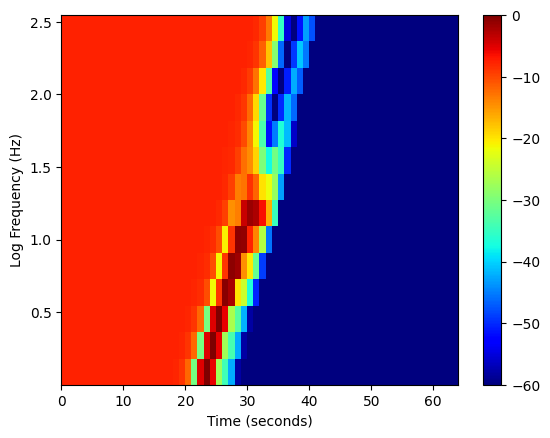

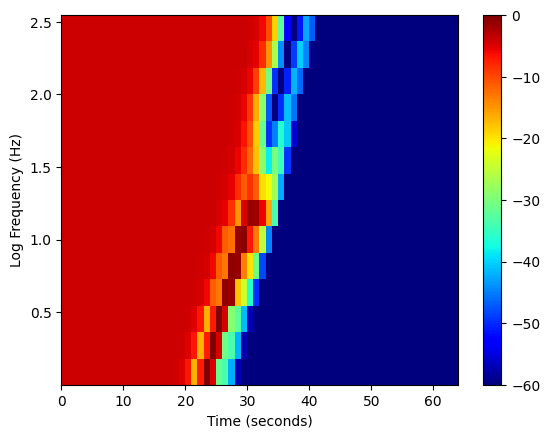

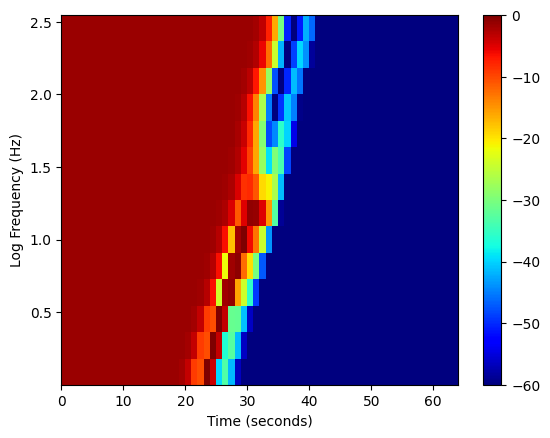

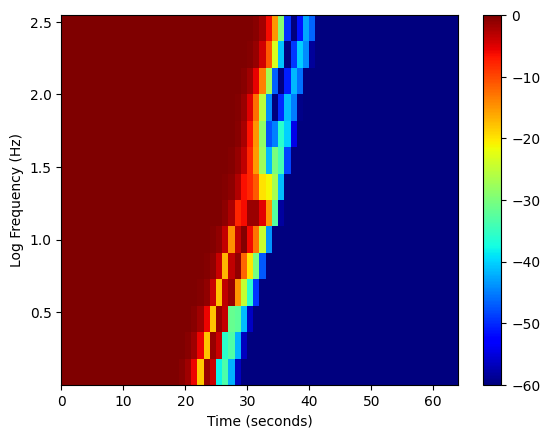

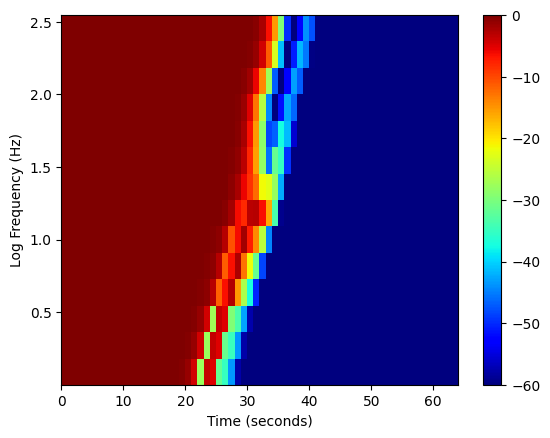

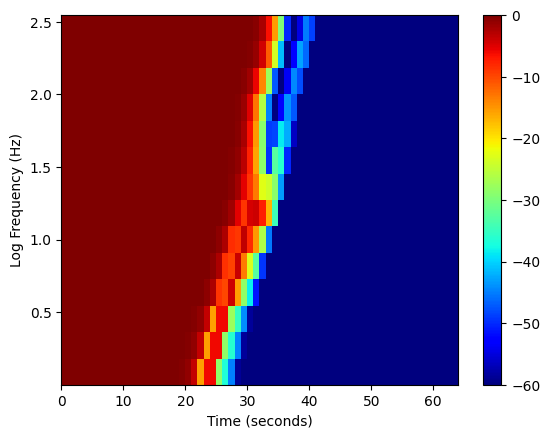

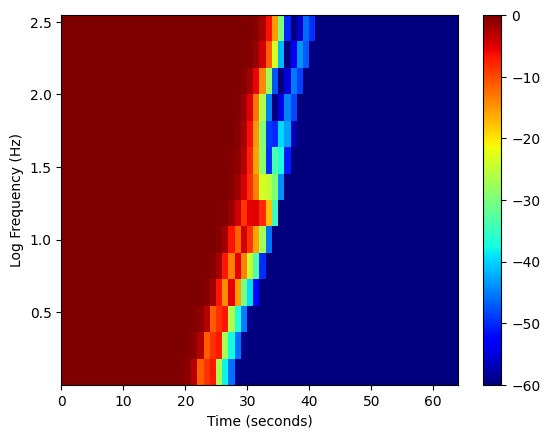

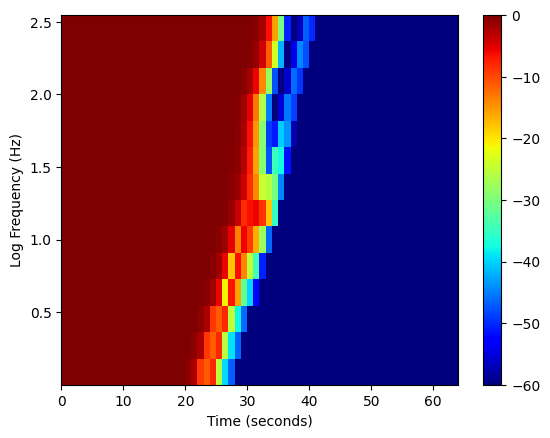

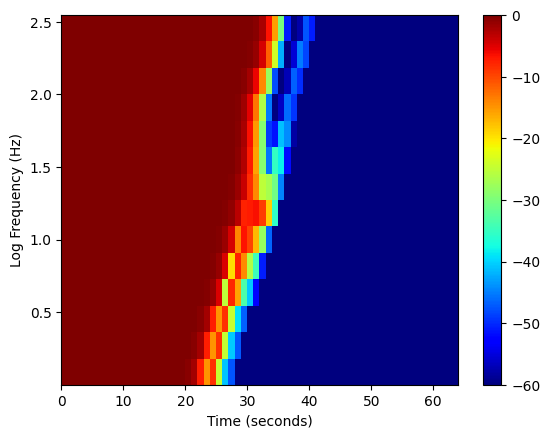

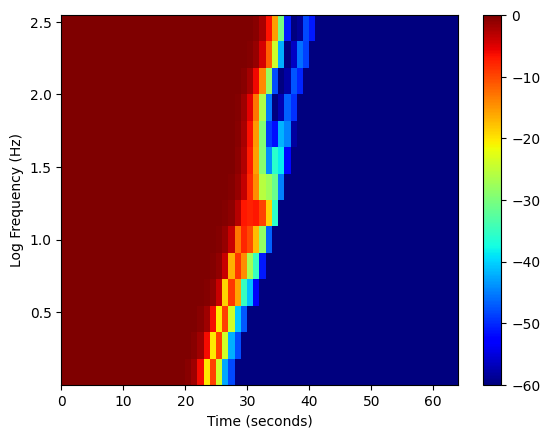

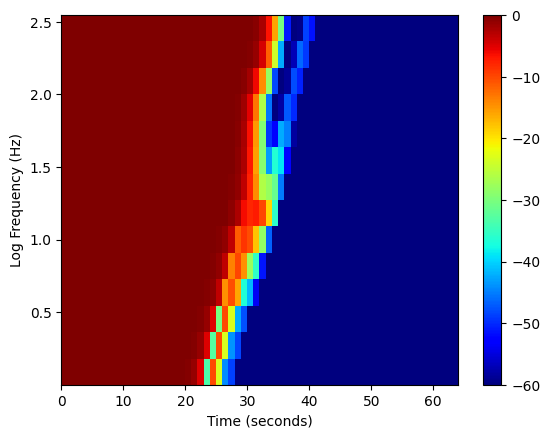

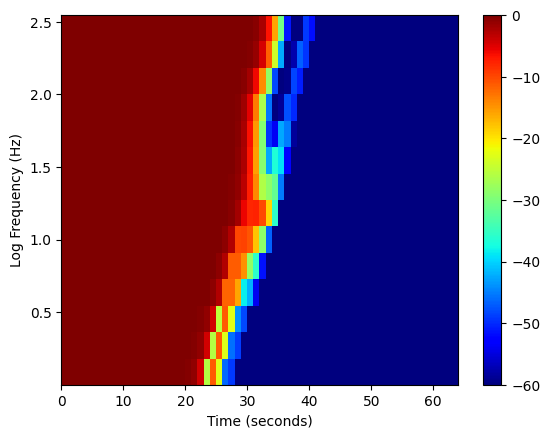

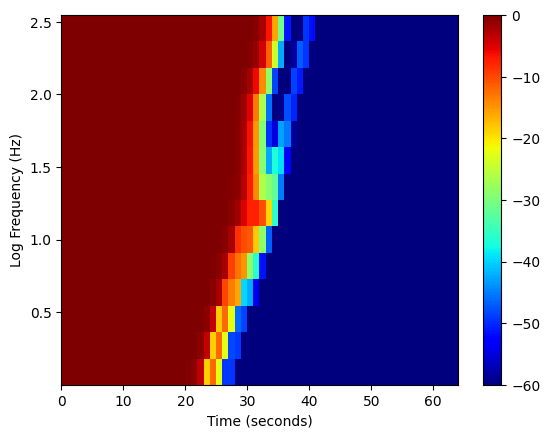

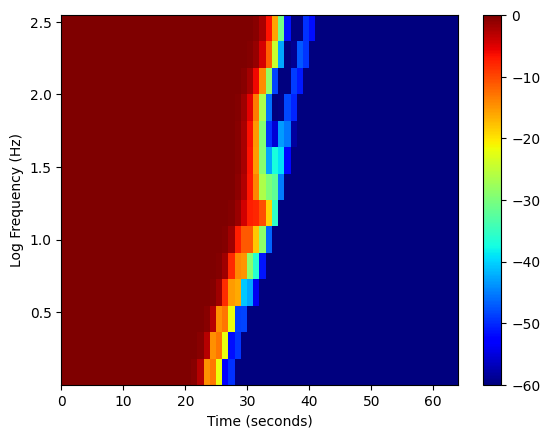

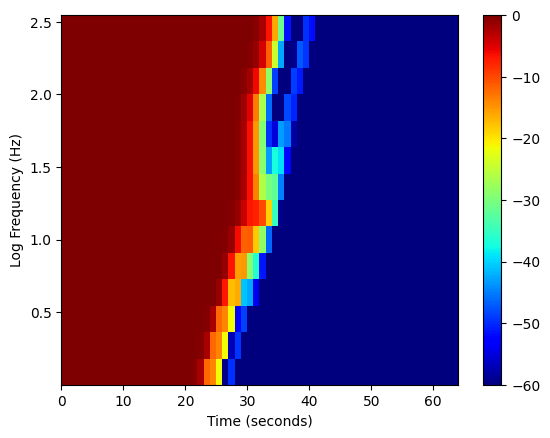

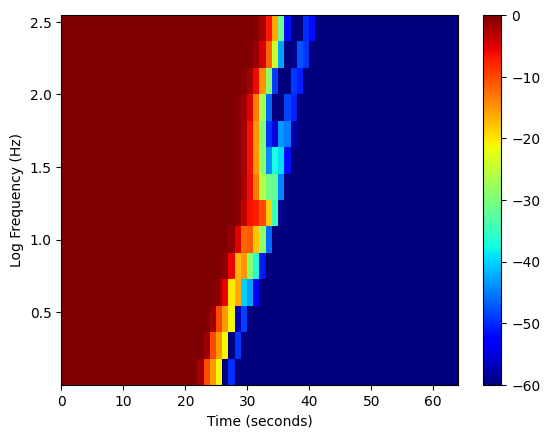

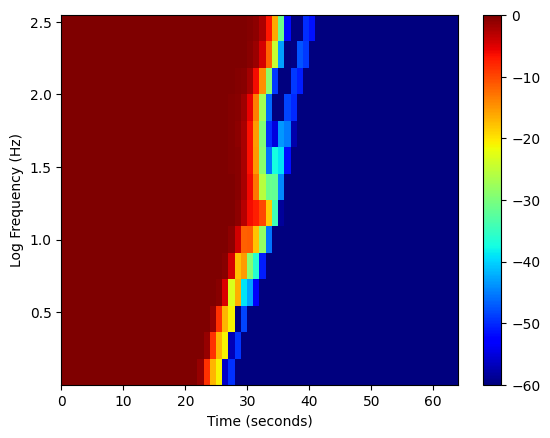

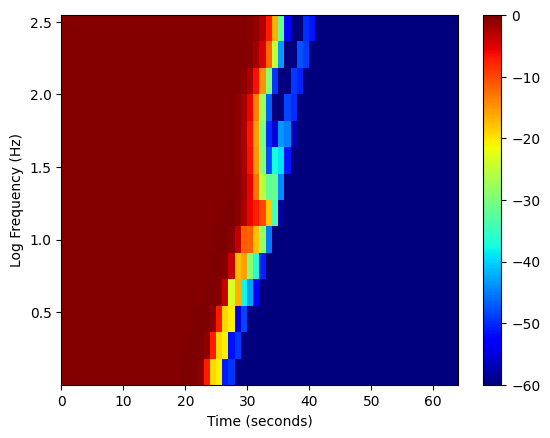

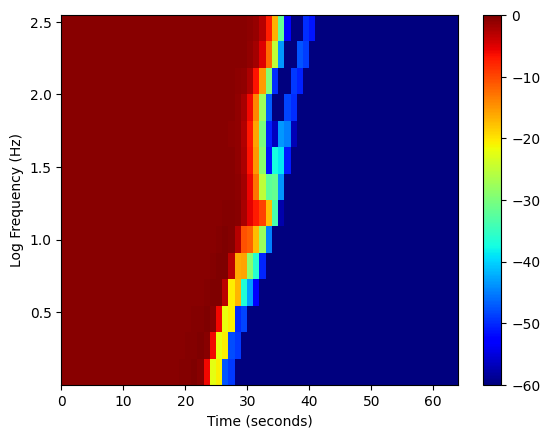

In [9]:
# Use this function when computing the time-frequency transform at a single temporal scale
omega = [0.00125, 0.0025, 0.005, 0.0125, 0.025, 0.05, 0.125, 0.25, 0.5, 1, 2, 4, 8, 16]
numfreqs = np.size(omega)
numlevels = 64
N = 1.0
c = 2.0
rectimecausgabor = RecursiveTimeCausGaborMethod(omega, delta_t, c, numlevels, N)

k = 32

levels_arr = np.zeros((numfreqs*numlevels, Nt))

for n in range(Nt):
    levels = rectimecausgabor.process(testsignal[n])
    logspectrogram = rectimecausgabor.spectrogram()

    flattened_logspectrogram = logspectrogram.flatten()
    
    ind = np.argpartition(flattened_logspectrogram, -k)[-k:] # index of the k highest elements

    levels_arr[ind,n] = 1


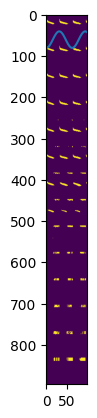

In [10]:

plt.imshow(levels_arr)

plt.plot(time, 20*testsignal+60)